<a href="https://colab.research.google.com/github/LWART-STUDIO/LearnDLAndML/blob/main/FinTehStartModule/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_5_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лекция 5. KNN.
Всем привет! Сегодня мы самостоятельно напишем алгоритм K-Nearest Neighbors.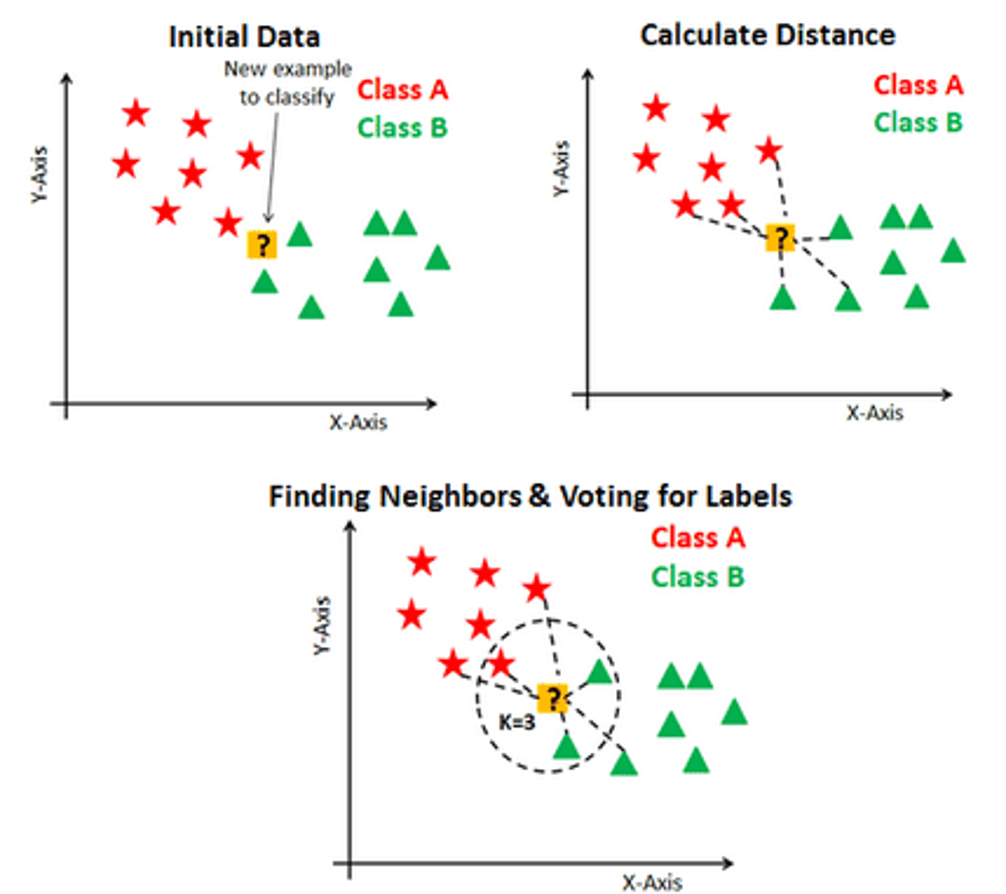

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import math
import operator
from sklearn.model_selection import train_test_split

iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
y = iris['Species']
X = iris.drop(columns = ['Species', 'Id'])
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


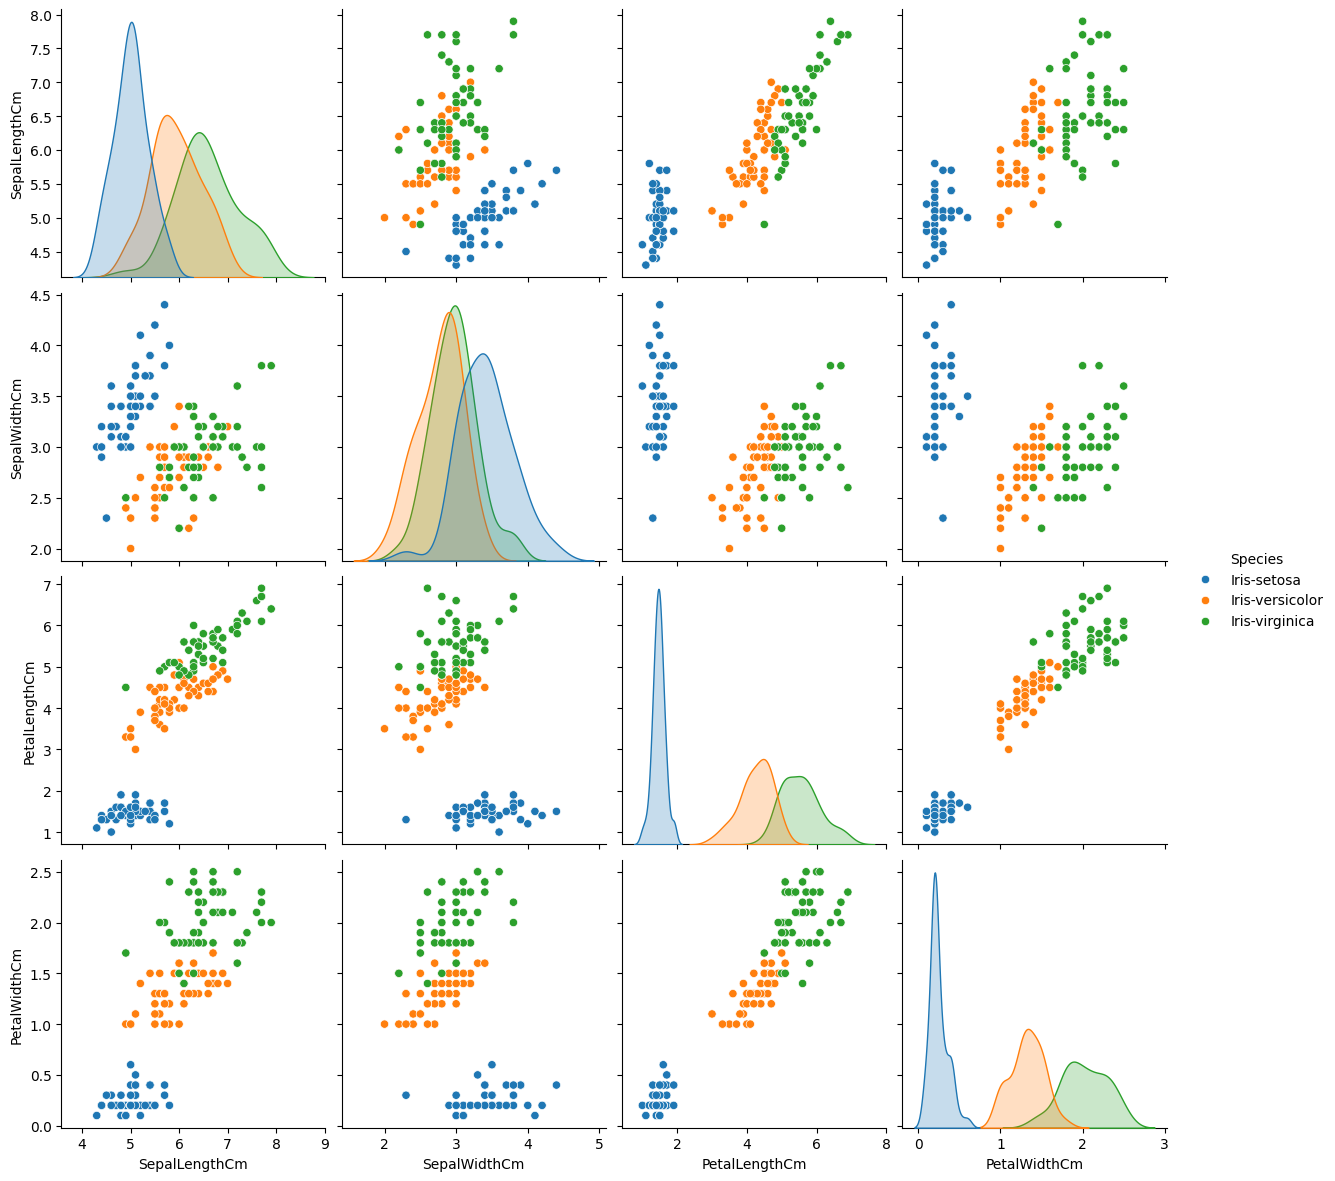

In [ ]:
import seaborn as sns
sns.pairplot(iris.drop(columns = ['Id']), hue="Species", size=3)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

В knn для определения расстояния между точками мы используем Евклидово расстояние.

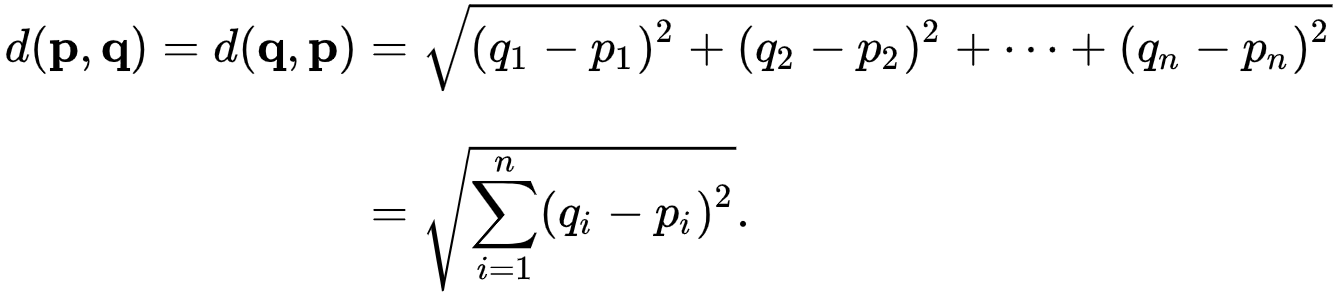

In [ ]:
# Creating a function which calculates the distance (eucledian distance) between two data points
def euclidian_distance(point1, point2):
    distance=0
    dim = len(point1)
    for i in range(dim):
        distance += np.square(point1[i] - point2[i])
    return np.sqrt(distance)

# Testing the function
point1 = [1,3,4]
point2 = [3,2,3]
dim = 3
testdistance = euclidian_distance(point1, point2)
print(testdistance)

2.449489742783178


In [ ]:
import numpy as np
from collections import Counter

def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for index, test_point in X_test.iterrows():
        distances = [euclidian_distance(test_point, train_point) for index, train_point in X_train.iterrows()]
        k_nearest_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train.iloc[i] for i in k_nearest_indices]
        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
        y_pred.append(most_common_label)
    return y_pred


def accuracy(y_test, y_pred):
    accuracy = np.sum(y_test == y_pred) / len(y_test)
    return accuracy


# Create an instance of the KNN class
predictions = knn_predict(X_train, y_train, X_test, k = 5)

# Calculate accuracy
acc = accuracy(y_test, predictions)
print(f'KNN accuracy: {acc}')

KNN accuracy: 1.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate metrics report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

